___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# display options
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="utf-8")

In [3]:
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin-1")

# "utf-8" did not work

In [4]:
df_female.shape

(1986, 108)

In [5]:
df_male.shape

(4082, 108)

In [6]:
df_female.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
...,...,...,...,...,...
DODRace,2,3,1,2,1
Age,26,21,23,22,45
Heightin,61,64,68,66,63
Weightlbs,142,120,147,175,195


In [7]:
df_male.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


In [8]:
df_female.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [9]:
df_male.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [5]:
df_female.columns.difference(df_male.columns)

Index(['SubjectId'], dtype='object')

In [6]:
df_male = df_male.rename(columns={'subjectid': 'SubjectId'})

In [7]:
df_female.columns.difference(df_male.columns)

Index([], dtype='object')

In [45]:
df0 = pd.concat([df_female, df_male])
df = df0.copy()

## Explore Data

In [9]:
print(f"Shape of df_female  : {df_female.shape}")
print(f"Shape of df_male    : {df_male.shape}")
print(f"Shape of combined df: {df.shape}")

Shape of df_female  : (1986, 108)
Shape of df_male    : (4082, 108)
Shape of combined df: (6068, 108)


In [10]:
df.Gender.value_counts(dropna=False)

Gender
Male      4082
Female    1986
Name: count, dtype: int64

In [16]:
df.isnull().sum()

SubjectId                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [11]:
df.isnull().sum()[df.isnull().sum() > 0]

Ethnicity    4647
dtype: int64

In [18]:
null_percentage = (df.isnull().sum() / df.shape[0] * 100).loc[lambda x : x > 0]
null_percentage

Ethnicity   76.582
dtype: float64

In [46]:
# Drop 'Ethnicity'
df = df.drop('Ethnicity', axis=1)

In [20]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Data columns (total 107 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                    int6

In [13]:
# Number of unique values in object features

print("Number of Unique Values in object features")
print("-----------------------------------------")
for col in df.select_dtypes("object"):
    print(f"{col} : {df[col].nunique()}")

Number of Unique Values in object features
-----------------------------------------
Gender : 2
Date : 253
Installation : 12
Component : 3
Branch : 3
PrimaryMOS : 285
SubjectsBirthLocation : 152
WritingPreference : 3


In [22]:
pd.set_option('display.max_rows', 200)
df.SubjectsBirthLocation.value_counts()

SubjectsBirthLocation
California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Missouri                     84
Arizona                      84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas            

In [47]:
# Number of unique values in object features

print("Number of Unique Values in object features")
print("-----------------------------------------")
for col in df.select_dtypes("object"):
    print(f"{col} : {df[col].nunique()}")

Number of Unique Values in object features
-----------------------------------------
Gender : 2
Date : 253
Installation : 12
Component : 3
Branch : 3
PrimaryMOS : 285
SubjectsBirthLocation : 152
WritingPreference : 3


### Drop unnecessary columns

In [57]:
# SubjectId – A unique number for each participant measured in the anthropometric survey 
# Heightin – Height in Inches; self-reported, comparable to measured “stature”
# Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”
# Installation – U.S. Army installation where the measurement occurred 
# PrimaryMOS – Primary Military Occupational Specialty

drop_columns = ["SubjectId", "Date", "Installation", "Component",
                "Branch", "PrimaryMOS", "Weightlbs", "Heightin"]

df.drop(drop_columns, axis=1, inplace=True)

In [19]:
df.shape

(6068, 99)

### Drop DODRace class if value count below 500

In [48]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [49]:
df.DODRace.value_counts(dropna=False)

DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64

In [58]:
# Drop DODRace class if value count below 500. Hence, select White, Black, Hispanic only

df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") | (df["DODRace"] == "Hispanic")]

In [59]:
df.DODRace.value_counts(dropna=False)

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

In [24]:
df.shape

(5769, 99)

In [51]:
df.reset_index(drop=True, inplace=True)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.000,247.254,37.458,155.000,220.000,243.000,272.000,451.000
acromialheight,5769.000,1408.630,78.303,1146.000,1353.000,1412.000,1464.000,1683.000
acromionradialelength,5769.000,328.072,20.445,249.000,314.000,328.000,342.000,393.000
anklecircumference,5769.000,225.202,15.966,156.000,214.000,225.000,235.000,293.000
axillaheight,5769.000,1301.903,71.261,1062.000,1252.000,1304.000,1351.000,1553.000
balloffootcircumference,5769.000,244.408,16.804,186.000,233.000,245.000,256.000,306.000
balloffootlength,5769.000,195.119,13.379,151.000,186.000,196.000,205.000,245.000
biacromialbreadth,5769.000,399.706,30.124,283.000,377.000,404.000,422.000,489.000
bicepscircumferenceflexed,5769.000,341.663,41.271,216.000,312.000,342.000,370.000,490.000
bicristalbreadth,5769.000,274.903,19.240,197.000,262.000,274.000,288.000,362.000


In [36]:
# Find out the columns where the "std" > "mean" (where there might be outliers)

describe = df.describe().T
describe[describe["std"] > describe["mean"]]

,count,mean,std,min,25%,50%,75%,max
SubjectNumericRace,5769.000,16.894,564.786,1.000,1.000,1.000,2.000,42351.000


In [37]:
df.groupby("DODRace")["SubjectNumericRace"].value_counts()

DODRace   SubjectNumericRace
Black     2                     1025
          8                       94
          21                      51
          23                      26
          28                      25
          251                     18
          25                      13
          42                       6
          3                        6
          62                       6
          38                       4
          18                       3
          235                      3
          218                      3
          231                      3
          1                        2
          2518                     2
          423                      2
          42351                    1
          4251                     1
          2351                     1
          428                      1
          425                      1
          238                      1
Hispanic  3                      522
          31                     112
         

In [52]:
# Drop "SubjectNumericRace" which might confuse the ML modules (multiple races forming large numbers)

df = df.drop("SubjectNumericRace", axis=1)

In [28]:
# Unique observations in object featurlars

#for i, feature in enumerate(df.select_dtypes("object").columns):
#   print(f"{i}.{feature:<7}: {df[feature].unique()}")

0.Gender : ['Female' 'Male']
1.SubjectsBirthLocation: ['nonUS' 'US']
2.DODRace: ['Black' 'Hispanic' 'White']
3.WritingPreference: ['Right hand' 'Left hand' 'Either hand (No preference)']


In [29]:
# Convert categorical columns to numerical using one-hot encoding
# Then, compute correlation matrix

cat = df.select_dtypes("object").columns

df_encoded = pd.get_dummies(df, columns=cat)

corr_matrix = df_encoded.corr()
corr_matrix

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,...,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Gender_Female,Gender_Male,SubjectsBirthLocation_US,SubjectsBirthLocation_nonUS,DODRace_Black,DODRace_Hispanic,DODRace_White,WritingPreference_Either hand (No preference),WritingPreference_Left hand,WritingPreference_Right hand
abdominalextensiondepthsitting,1.000,0.352,0.313,0.519,0.281,0.457,0.333,0.418,0.691,0.506,0.724,0.366,0.531,0.626,0.520,0.739,0.841,0.246,0.476,0.324,0.659,0.337,0.628,0.826,0.778,0.296,0.189,0.463,0.200,0.242,0.404,0.140,0.264,0.280,0.439,0.345,0.346,0.628,0.729,0.306,0.415,0.419,0.457,0.301,0.362,0.363,0.329,0.503,0.437,0.595,...,0.542,0.275,0.349,0.221,0.348,0.674,0.294,0.657,0.627,0.321,0.311,0.149,0.280,0.638,0.287,0.188,0.274,0.423,0.277,0.318,0.308,0.353,0.293,0.730,0.725,0.389,0.261,0.186,0.231,0.729,0.572,0.859,0.940,0.959,0.579,0.147,0.825,0.547,0.383,0.386,-0.316,0.316,0.026,-0.026,-0.039,-0.009,0.040,-0.029,0.018,-0.008
acromialheight,0.352,1.000,0.868,0.505,0.987,0.694,0.798,0.733,0.523,0.402,0.628,0.705,0.570,0.584,0.507,0.283,0.342,0.867,0.811,0.747,0.409,0.984,0.543,0.531,0.281,0.959,0.899,0.342,0.411,0.359,0.440,0.278,0.293,0.814,0.672,0.827,0.847,0.635,0.572,0.863,0.894,0.709,0.717,0.753,0.407,0.432,0.548,0.797,0.448,0.208,...,0.592,0.896,0.932,0.856,0.678,0.327,0.540,0.628,0.652,0.867,0.709,0.893,0.822,0.690,0.889,0.542,0.821,0.872,0.880,0.884,0.980,0.985,0.945,0.277,0.445,0.804,0.891,0.327,0.884,0.734,0.728,0.439,0.405,0.362,0.607,0.931,0.678,0.734,0.921,0.083,-0.633,0.633,0.061,-0.061,-0.100,-0.170,0.203,-0.028,0.040,-0.030
acromionradialelength,0.313,0.868,1.000,0.416,0.857,0.604,0.726,0.667,0.452,0.343,0.560,0.615,0.520,0.514,0.456,0.247,0.292,0.814,0.775,0.735,0.355,0.866,0.466,0.470,0.266,0.842,0.850,0.247,0.307,0.311,0.370,0.234,-0.005,0.639,0.587,0.749,0.818,0.557,0.501,0.836,0.820,0.624,0.632,0.720,0.354,0.390,0.483,0.709,0.439,0.182,...,0.541,0.831,0.861,0.812,0.555,0.284,0.475,0.546,0.569,0.791,0.665,0.829,0.800,0.621,0.967,0.514,0.647,0.871,0.940,0.894,0.856,0.862,0.849,0.238,0.382,0.801,0.825,0.292,0.832,0.582,0.610,0.374,0.355,0.328,0.481,0.846,0.596,0.643,0.677,0.082,-0.547,0.547,0.054,-0.054,-0.014,-0.162,0.122,-0.027,0.042,-0.032
anklecircumference,0.519,0.505,0.416,1.000,0.461,0.710,0.562,0.537,0.638,0.450,0.641,0.692,0.520,0.532,0.504,0.566,0.577,0.355,0.500,0.329,0.817,0.509,0.560,0.613,0.486,0.482,0.375,0.463,0.378,0.215,0.368,0.236,0.310,0.513,0.651,0.579,0.451,0.663,0.612,0.451,0.513,0.573,0.608,0.453,0

In [31]:
df["DODRace"].value_counts(normalize=True)

DODRace
White      0.657
Black      0.225
Hispanic   0.118
Name: proportion, dtype: float64

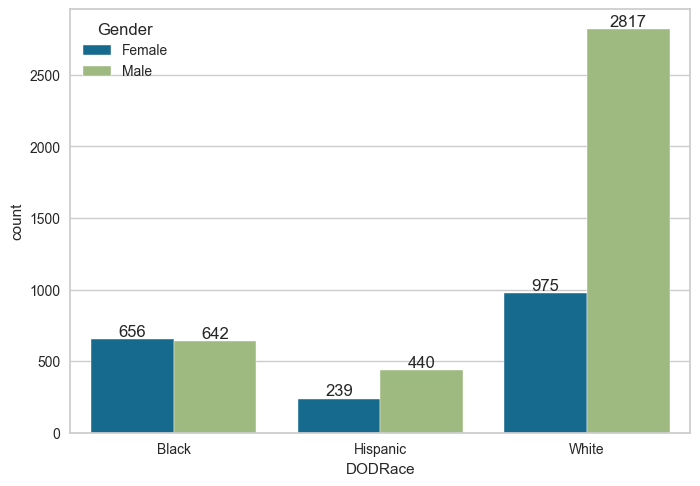

In [30]:
ax = sns.countplot(x="DODRace", data = df, hue = "Gender")
for p in ax.containers:
    ax.bar_label(p)

# Distribution over the "Gender"

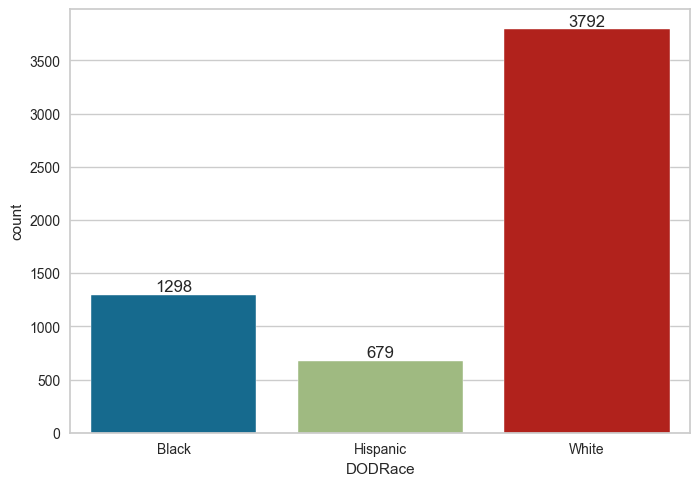

In [32]:
ax = sns.countplot(x="DODRace", data = df)
ax.bar_label(ax.containers[0]);

# Data appears to be inbalanced. But, we need to check the scores to make a final decision

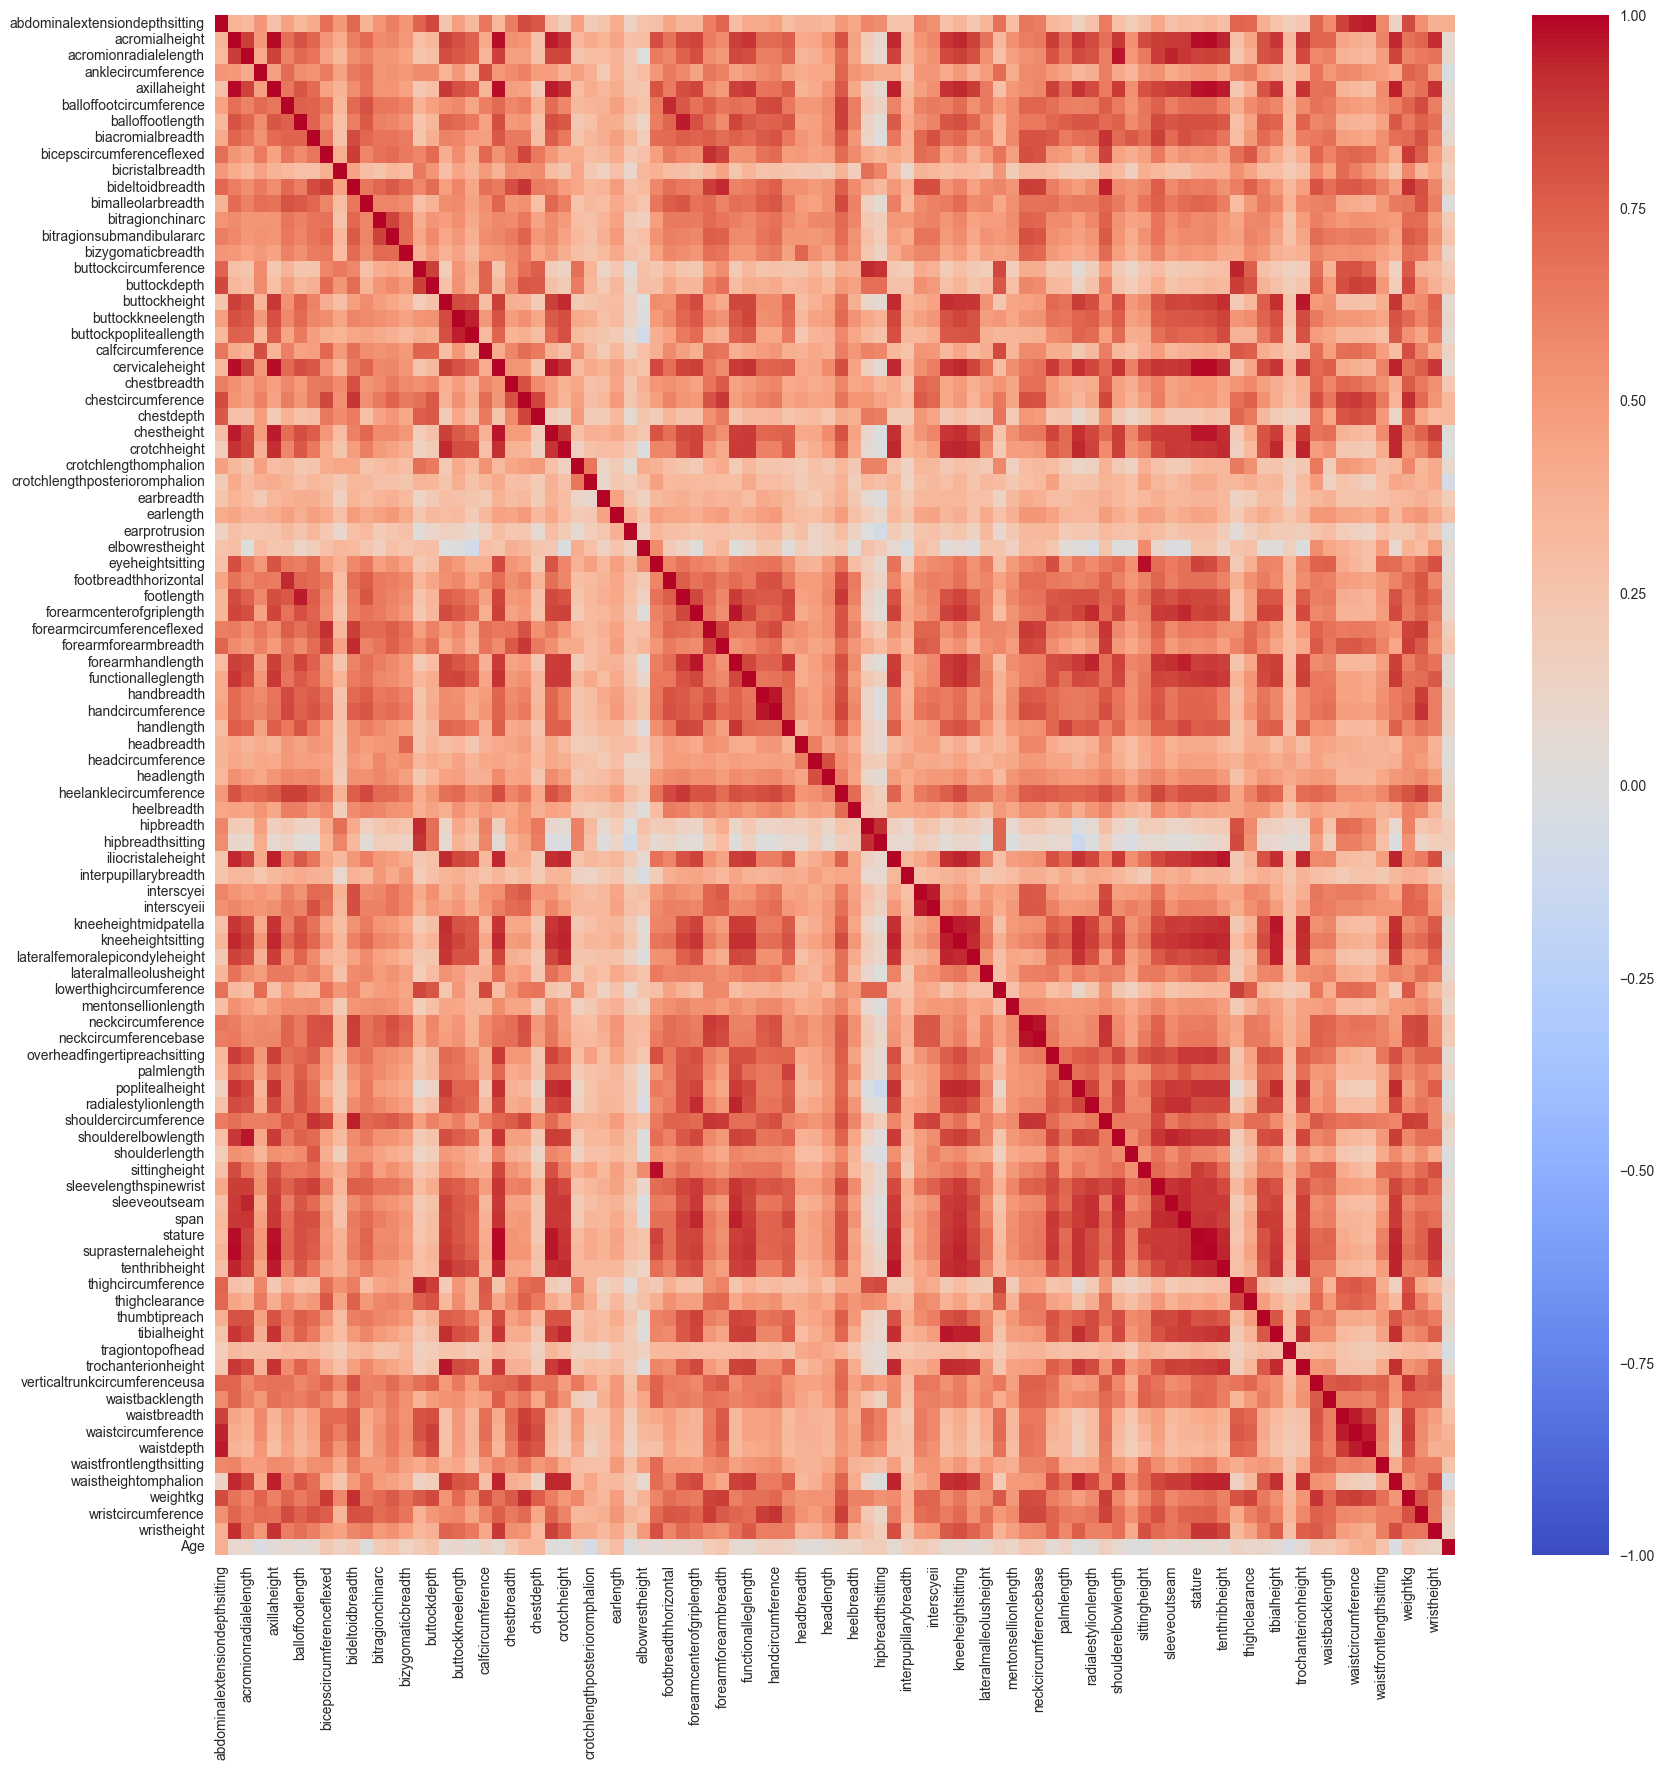

In [143]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm");

In [33]:
df.astype(str).duplicated(keep=False).sum()

0

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [61]:
X = df.drop("DODRace", axis=1)
y = df.DODRace

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

### Vanilla Logistic Model

In [63]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [64]:
# Define the list of the cathegorial features in X_train as 'cat_onehot'

# cat_onehot = X_train.select_dtypes("object").columns

cat_onehot  = ['Gender', 'SubjectsBirthLocation', 'WritingPreference']

In [130]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot), 
                         remainder=MinMaxScaler(), 
                         verbose_feature_names_out=False)

In [66]:
pd.DataFrame(column_trans.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.391,0.617,0.528,0.517,0.644,0.603,0.613,0.446,0.308,0.355,0.272,0.468,0.467,0.562,0.304,0.506,0.519,0.331,0.338,0.265,0.304,0.391,0.415,0.360,0.441,0.295,0.398,0.436,0.435,0.400,0.353,0.384,0.455,0.509,0.508,0.439,0.423,0.705,0.478,0.516,0.581,0.696,0.654,0.615,0.594,0.334,0.465,0.478,0.386,0.268
1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.326,0.504,0.491,0.441,0.467,0.560,0.609,0.542,0.519,0.358,0.307,0.468,0.479,0.504,0.500,0.403,0.481,0.205,0.214,0.530,0.283,0.459,0.560,0.306,0.513,0.385,0.564,0.472,0.495,0.508,0.486,0.516,0.561,0.574,0.508,0.371,0.507,0.568,0.536,0.445,0.470,0.480,0.415,0.267,0.500,0.507,0.375,0.467,0.474,0.488
2,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.217,0.383,0.566,0.607,0.600,0.325,0.307,0.485,0.423,0.496,0.525,0.516,0.498,0.554,0.587,0.297,0.692,0.418,0.402,0.534,0.500,0.577,0.572,0.520,0.632,0.641,0.533,0.592,0.602,0.600,0.530,0.530,0.529,0.384,0.390,0.475,0.489,0.659,0.494,0.438,0.518,0.392,0.337,0.221,0.391,0.539,0.358,0.543,0.417,0.341
3,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.652,0.639,0.604,0.593,0.578,0.330,0.356,0.650,0.481,0.486,0.428,0.488,0.584,0.558,0.370,0.361,0.577,0.573,0.667,0.802,0.522,0.573,0.642,0.646,0.803,0.538,0.907,0.704,0.719,0.764,0.739,0.722,0.629,0.472,0.593,0.551,0.511,0.841,0.566,0.558,0.656,0.332,0.299,0.214,0.693,0.668,0.482,0.620,0.551,0.122
4,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.435,0.511,0.547,0.517,0.578,0.397,0.383,0.458,0.692,0.422,0.374,0.516,0.603,0.517,0.543,0.416,0.577,0.460,0.462,0.414,0.478,0.577,0.635,0.542,0.533,0.359,0.246,0.557,0.542,0.590,0.391,0.420,0.441,0.467,0.432,0.424,0.489,0.682,0.494,0.350,0.379,0.456,0.482,0.397,0.391,0.472,0.448,0.533,0.283,0.610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4610,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.

In [80]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression

operations = [("OneHotEncoder", column_trans),
              ("logistic", LogisticRegression(class_weight="balanced"))]

pipe_log_model = Pipeline(steps=operations)

pipe_log_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [81]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  11   9]
 [ 13 102  21]
 [ 10  93 655]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       260
    Hispanic       0.50      0.75      0.60       136
       White       0.96      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 975   33   30]
 [  14  463   66]
 [  69  350 2615]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.84      4615
weighted avg       0.91      0.88      0.89      4615



The figures show that, train  and test values for 'Black' and 'White' seem close to each other.
However, there is a big difference and quite low values for 'Hispamic' set.
Therefore, we will mainly focus on improving these values.

#### Cross Validate

In [82]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [83]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

operations = [("OneHotEncoder", column_trans),
              ("logistic", LogisticRegression(class_weight="balanced", max_iter=10000))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train,
                        scoring = scoring, 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.619
train_f1_Hispanic          0.661
test_precision_Hispanic    0.510
train_precision_Hispanic   0.540
test_recall_Hispanic       0.790
train_recall_Hispanic      0.853
dtype: float64

### Logistic Model GridsearchCV

In [85]:
f1_Hispanic = make_scorer(f1_score, average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])

In [133]:
param_grid = {
    "logistic__C": [0.5, 1],
    'logistic__penalty': ["l1", "l2"],
    'logistic__solver': ['liblinear', 'lbfgs']
}

operations = [("OneHotEncoder", column_trans),
              ("logistic", LogisticRegression(class_weight="balanced", max_iter=10000))]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,   # Find parameters for the best recall scores for Hispanic.
                              n_jobs=-1,
                              cv=5,
                              return_train_score=True)

In [134]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.5, 1],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [135]:
log_model_grid.best_params_

{'logistic__C': 1, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}

In [136]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000))])

In [91]:
log_model_grid.best_score_

0.7791029561671764

In [137]:
pd.DataFrame(log_model_grid.cv_results_).loc[log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

# Check for overfiting.

mean_test_score    0.779
mean_train_score   0.857
Name: 7, dtype: object

We see that the best parameters from the GridSearch process are default values. So our default values were the values that gave the best results. We do not need to CrossValidate again after GridSearch.

In [93]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  11   9]
 [ 13 102  21]
 [ 10  93 655]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       260
    Hispanic       0.50      0.75      0.60       136
       White       0.96      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 975   33   30]
 [  14  463   66]
 [  69  350 2615]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.84      4615
weighted avg       0.91      0.88      0.89      4615



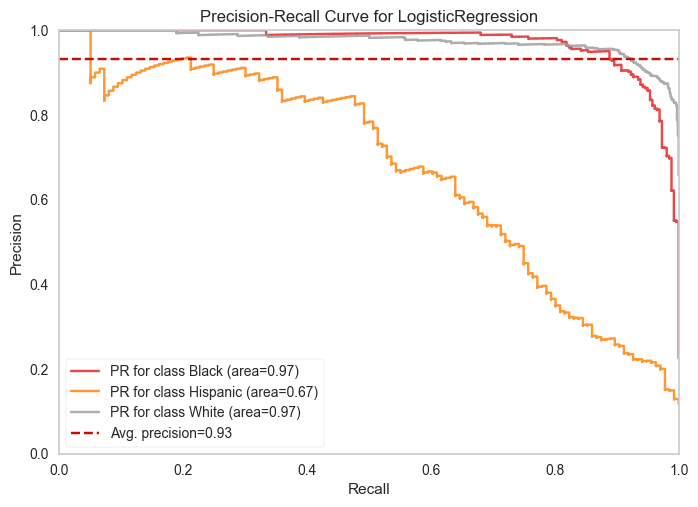

[CV 1/5] END logistic__C=0.5, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.669, test=0.667) total time=   5.5s
[CV 2/5] END logistic__C=0.5, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.669, test=0.630) total time=   5.1s
[CV 5/5] END logistic__C=1, logistic__penalty=l2, logistic__solver=lbfgs;, score=(train=0.866, test=0.725) total time=   1.6s
[CV 4/5] END logistic__C=0.5, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.684, test=0.578) total time=   3.8s
[CV 1/5] END logistic__C=1, logistic__penalty=l2, logistic__solver=lbfgs;, score=(train=0.853, test=0.796) total time=   0.7s
[CV 3/5] END logistic__C=1, logistic__penalty=l2, logistic__solver=lbfgs;, score=(train=0.855, test=0.826) total time=   0.6s
[CV 1/5] END logistic__C=0.5, logistic__penalty=l1, logistic__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END logistic__C=0.5, logistic__penalty=l1, logistic__solver=lbfgs;, score=(train=nan, test=na

[CV 2/5] END logistic__C=0.5, logistic__penalty=l1, logistic__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/5] END logistic__C=0.5, logistic__penalty=l2, logistic__solver=liblinear;, score=(train=0.691, test=0.596) total time=   0.9s
[CV 3/5] END logistic__C=1, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.687, test=0.716) total time=   6.5s
[CV 3/5] END logistic__C=0.5, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.647, test=0.688) total time=   5.1s
[CV 2/5] END logistic__C=0.5, logistic__penalty=l2, logistic__solver=liblinear;, score=(train=0.676, test=0.648) total time=   0.9s
[CV 2/5] END logistic__C=1, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.701, test=0.639) total time=   6.0s
[CV 4/5] END logistic__C=0.5, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.684, test=0.578) total time=   3.8s
[CV 4/5] END logistic__C=1, logistic__penalty=l2, logistic__solver=liblinear;, score=(tr

In [138]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans),
              ("logistic", LogisticRegression(class_weight='balanced'))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],   # Tabloda isimler gorunsun diye bunu yazdik.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [240]:
pd.get_dummies(y_test).values

array([[ True, False, False],
       [False, False,  True],
       [False, False,  True],
       ...,
       [ True, False, False],
       [False, False,  True],
       [False, False,  True]])

In [241]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# 0 black, 1 hispanic, 2 white skorlarını döndürür.
# Burda 1 vererek hispanic skorları aldık.

0.4858537475861563

In [242]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# tüm modellerden aldığımız skorları aşağıda tabloda karşılaştıracağımızdan skorlarımızı değişkenlere atıyoruz.

## 2. SVC

### Vanilla SVC model 

In [144]:
from sklearn.svm import SVC

In [145]:
operations = [("OneHotEncoder", column_trans),
              ("svc", SVC(class_weight="balanced"))]

pipe_svc_model = Pipeline(steps=operations)

pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(class_weight='balanced'))])

In [146]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [ 12 102  22]
 [ 15 111 632]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.45      0.75      0.57       136
       White       0.95      0.83      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.84      0.86      1154


Train_Set
[[ 956   39   43]
 [  20  459   64]
 [  53  397 2584]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.51      0.85      0.64       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



#### Cross Validate

In [147]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

operations = [("OneHotEncoder", column_trans),
              ("svc", SVC(class_weight="balanced"))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train,
                        scoring = scoring, 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.587
train_f1_Hispanic          0.634
test_precision_Hispanic    0.473
train_precision_Hispanic   0.508
test_recall_Hispanic       0.775
train_recall_Hispanic      0.842
dtype: float64

###  SVC Model GridsearchCV

In [155]:
param_grid = {'svc__C': [0.5, 1],
              'svc__gamma': ["scale", "auto", 0.1],
             'svc__kernel': ["rbf", "linear"]}


operations = [("OneHotEncoder", column_trans),
              ("svc", SVC(class_weight="balanced"))]

model = Pipeline(steps=operations)


svc_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,   # Find parameters for the best recall scores for Hispanic.
                              n_jobs=-1, cv=10)

In [156]:
svc_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('svc', SVC(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.1]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [157]:
svc_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'scale'}

In [158]:
svc_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced'))])

In [159]:
eval_metric(svc_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [ 12 102  22]
 [ 15 111 632]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.45      0.75      0.57       136
       White       0.95      0.83      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.84      0.86      1154


Train_Set
[[ 956   39   43]
 [  20  459   64]
 [  53  397 2584]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.51      0.85      0.64       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



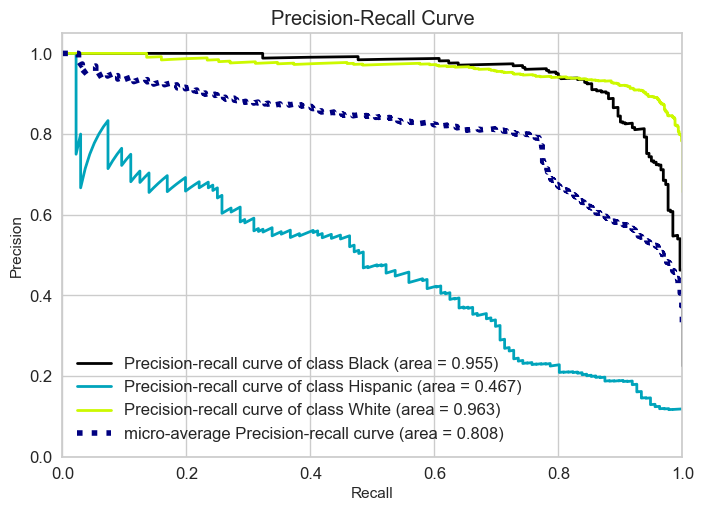

In [243]:
operations = [("OneHotEncoder", column_trans),
              ("svc", SVC(C=1, class_weight="balanced",kernel="linear", gamma="scale"))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [244]:
decision_function

array([[ 2.33220126,  0.67605183, -0.33205093],
       [-0.33149704,  2.33041911,  1.3284417 ],
       [-0.33030829,  0.71488392,  2.33046235],
       ...,
       [ 2.33127557,  1.27746196, -0.33133678],
       [-0.33119413,  0.66937218,  2.33213441],
       [-0.3318601 ,  1.32864402,  2.33119899]])

In [245]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.46728242858928304

In [246]:
y_pred = svc_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [163]:
cat_ord  = ['Gender', 'SubjectsBirthLocation', 'WritingPreference']

In [164]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat_ord),
                                       remainder='passthrough')

In [165]:
from sklearn.ensemble import RandomForestClassifier

operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced"))]

pipe_RF_model = Pipeline(steps=operations)

pipe_RF_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('RF_model', RandomForestClassifier(class_weight='balanced'))])

In [166]:
eval_metric(pipe_RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[181   1  78]
 [  8   6 122]
 [  6   2 750]]
              precision    recall  f1-score   support

       Black       0.93      0.70      0.80       260
    Hispanic       0.67      0.04      0.08       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.79      0.58      0.59      1154
weighted avg       0.81      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



There is significant overfittting especially in "Hispanic" data.
In the next steps we will try to improve the scores by playing with the hyperparameters.

#### Cross Validate

In [167]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced"))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train,
                        scoring = scoring, 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.051
train_f1_Hispanic          1.000
test_precision_Hispanic    0.542
train_precision_Hispanic   1.000
test_recall_Hispanic       0.027
train_recall_Hispanic      1.000
dtype: float64

### RF Model GridsearchCV

In [174]:
param_grid = {"RF_model__n_estimators":[400, 500],
              "RF_model__max_depth": [2, 3],
              #"RF_model__min_samples_split": [2, 3, 5],
              #"RF_model__min_samples_leaf": [1, 2, 4],
              "RF_model__max_features":["sqrt", "log2"]}

                


operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced"))]

model = Pipeline(steps=operations)


RF_model_grid = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,   # Find parameters for the best recall scores for Hispanic.
                             n_jobs=-1, 
                             cv=5,
                             return_train_score = True)

In [175]:
RF_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__max_features': ['sqrt', 'log2'],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [176]:
RF_model_grid.best_params_

{'RF_model__max_depth': 2,
 'RF_model__max_features': 'log2',
 'RF_model__n_estimators': 500}

In [177]:
pd.DataFrame(RF_model_grid.cv_results_).loc[RF_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

# Check for overfiting.

mean_test_score    0.654
mean_train_score   0.692
Name: 3, dtype: object

In [188]:
eval_metric(RF_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[182  55  23]
 [  9  91  36]
 [ 55 305 398]]
              precision    recall  f1-score   support

       Black       0.74      0.70      0.72       260
    Hispanic       0.20      0.67      0.31       136
       White       0.87      0.53      0.66       758

    accuracy                           0.58      1154
   macro avg       0.60      0.63      0.56      1154
weighted avg       0.76      0.58      0.63      1154


Train_Set
[[ 716  235   87]
 [  42  373  128]
 [ 209 1263 1562]]
              precision    recall  f1-score   support

       Black       0.74      0.69      0.71      1038
    Hispanic       0.20      0.69      0.31       543
       White       0.88      0.51      0.65      3034

    accuracy                           0.57      4615
   macro avg       0.61      0.63      0.56      4615
weighted avg       0.77      0.57      0.62      4615



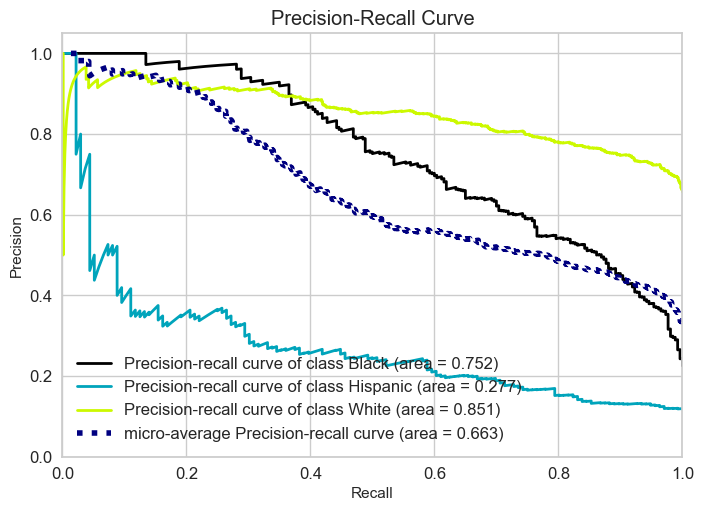

In [248]:
# from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                  max_depth=2,
                                                  max_features="log2",
                                                  n_estimators=500))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [249]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.2767326525250043

In [250]:
y_pred = RF_model_grid.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [190]:
import xgboost as xgb
from xgboost import XGBClassifier

In [191]:
xgb.__version__

'1.7.3'

In [194]:
# The new version requires targets to have numeric data
y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2})  # The same order as classification_report
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2}) 


operations = [("OneHotEncoder", column_trans),
              ("XGB_model", XGBClassifier())]

pipe_XGB_model = Pipeline(steps=operations)

pipe_XGB_model.fit(X_train, y_train_xgb)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [196]:
eval_metric(pipe_XGB_model, X_train, y_train_xgb, X_test, y_test_xgb)  #(0: Black, 1: Hispanic, 2: White)

Test_Set
[[227   1  32]
 [  7  51  78]
 [ 11  15 732]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       260
           1       0.76      0.38      0.50       136
           2       0.87      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.74      0.77      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [200]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                  y=y_train_xgb)

class_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [204]:
my_dict = {"weight": class_weights, "label":y_train_xgb }
comp = pd.DataFrame(my_dict)

comp.head()

,weight,label
5204,0.507,2
5393,0.507,2
5528,0.507,2
3861,0.507,2
3205,0.507,2


In [205]:
comp.sample(5)

,weight,label
5545,0.507,2
744,1.482,0
4313,0.507,2
4814,0.507,2
458,0.507,2


In [206]:
comp.groupby('label').value_counts()

label  weight
0      1.482     1038
1      2.833      543
2      0.507     3034
Name: count, dtype: int64

In [207]:
pipe_XGB_model.fit(X_train,
                   y_train_xgb,
                   XGB_model__sample_weight=class_weights)  # Define the class_weight at this step

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [208]:
eval_metric(pipe_XGB_model, X_train, y_train_xgb, X_test, y_test_xgb)  #(0: Black, 1: Hispanic, 2: White)

Test_Set
[[229   3  28]
 [ 10  61  65]
 [ 17  28 713]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       260
           1       0.66      0.45      0.54       136
           2       0.88      0.94      0.91       758

    accuracy                           0.87      1154
   macro avg       0.81      0.76      0.78      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



#### Cross Validate

In [211]:
scoring_xgb = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =[1]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[1])}

operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBClassifier())]

model = Pipeline(steps=operations)


scores = cross_validate(model,
                        X_train,
                        y_train_xgb,
                        scoring = scoring_xgb, 
                        cv = 5,
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight":class_weights})

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.545
train_f1_Hispanic          1.000
test_precision_Hispanic    0.713
train_precision_Hispanic   1.000
test_recall_Hispanic       0.442
train_recall_Hispanic      1.000
dtype: float64

### XGBoost Model GridsearchCV

In [217]:
param_grid = {"XGB_model__n_estimators":[30, 40],
              "XGB_model__max_depth":[2,3,4], 
              "XGB_model__learning_rate": [0.05, 0.1],
              "XGB_model__subsample":[0.8, 1], 
              "XGB_model__colsample_bytree":[0.8, 1]}


operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBClassifier())]

model = Pipeline(steps=operations)


XGB_model_grid = GridSearchCV(model,
                             param_grid,
                             scoring=make_scorer(recall_score, average = None, labels =[1]),   # Find parameters for the best recall scores for Hispanic.
                             n_jobs=-1, 
                             cv=5,
                             return_train_score = True)

In [220]:
XGB_model_grid.fit(X_train,
                   y_train_xgb,
                   XGB_model__sample_weight=class_weights)  # Define the class_weight at this step

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_byleve...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.05, 0.1],
                         'XGB_model__max_depth': [2, 3, 4],
                         'XGB_model__n_estimators': [30, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [221]:
XGB_model_grid.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [222]:
XGB_model_grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [223]:
pd.DataFrame(XGB_model_grid.cv_results_).loc[XGB_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.622
mean_train_score   0.774
Name: 19, dtype: object

In [224]:
eval_metric(XGB_model_grid, X_train, y_train_xgb, X_test, y_test_xgb)  #(0: Black, 1: Hispanic, 2: White)

Test_Set
[[210  24  26]
 [  9  85  42]
 [ 54 132 572]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       260
           1       0.35      0.62      0.45       136
           2       0.89      0.75      0.82       758

    accuracy                           0.75      1154
   macro avg       0.67      0.73      0.69      1154
weighted avg       0.80      0.75      0.77      1154


Train_Set
[[ 929   54   55]
 [  29  410  104]
 [ 137  484 2413]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1038
           1       0.43      0.76      0.55       543
           2       0.94      0.80      0.86      3034

    accuracy                           0.81      4615
   macro avg       0.74      0.82      0.76      4615
weighted avg       0.86      0.81      0.83      4615



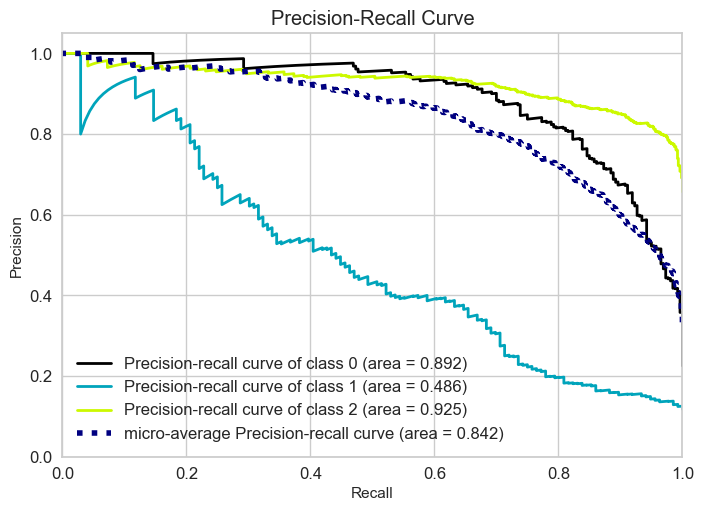

In [251]:
from scikitplot.metrics import plot_roc, plot_precision_recall, precision_recall_curve

operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBClassifier(colsample_bytree=0.8,
                                          learning_rate=0.1,
                                          max_depth=3,
                                          n_estimators=40,
                                          subsample=1))]

model = Pipeline(steps=operations)


model.fit(X_train,
          y_train_xgb,
          XGB_model__sample_weight=class_weights)


y_pred_proba = model.predict_proba(X_test)


plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show();

In [252]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [253]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.4858537475861563

In [254]:
y_pred = XGB_model_grid.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

---
---

# Comparing Models

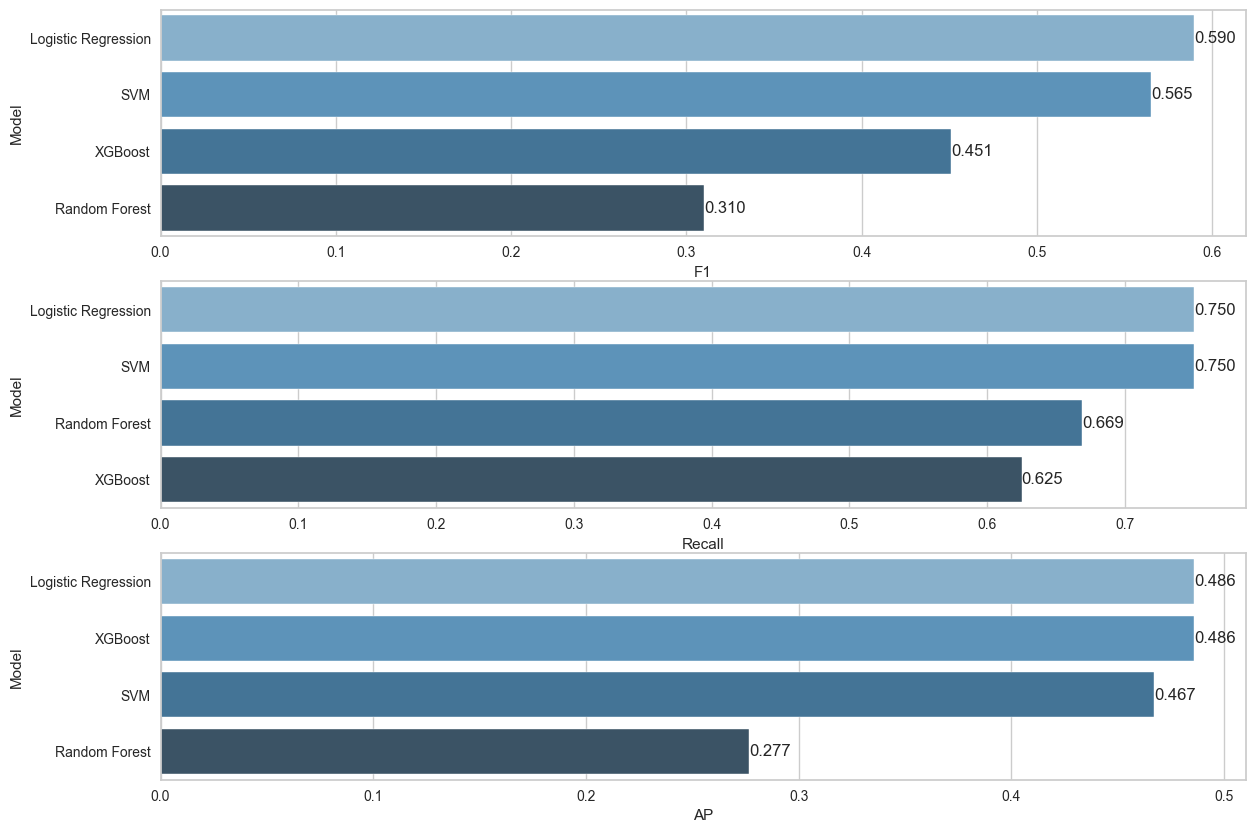

In [255]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___